In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import make_regression as MR
from sklearn.linear_model import LinearRegression as LR, Lasso as LLR
from sklearn.model_selection import train_test_split, KFold, cross_val_score

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F 

import torchvision
from torchvision import *
from torch.nn import *
from NN import NN

from PIL import Image, ImageDraw, ImageFont
from tqdm import tqdm
 
from sklearn import datasets
from random import shuffle


In [2]:
def SSUM(df,columns):
    if(columns  != []):
        return (df[columns[0]]+SSUM(df,columns[1:]))
    return ''

categoricals=['sex','cp','fbs','restecg','exng','slp','caa','thall']
df=pd.read_csv('heart.csv')
X=df.drop(['output'],axis=1).applymap(str)
Y=df[['output']].to_numpy()
Y=Y.reshape(-1)

X['categoricals']=SSUM(X,categoricals)
X=X.drop(categoricals,axis=1).to_numpy()[:,::-1]

In [3]:
grid=[(0,0),(0,65),(0,130),(0,195),(140,100),(140,175)]
font_size=[50]*6

In [4]:
def sampletoimage(sample):
 img =  Image.fromarray(np.zeros((255,255)).astype('uint8'))
 draw = ImageDraw.Draw(img)    
 for f,s,g in zip(font_size,sample,grid):
  font = ImageFont.truetype("./font.ttf", size=f)
  draw.text(g,str(s),font=font, fill='white')

 return [np.array(img) for _ in range(3)]

In [5]:
X=np.array(list(map(sampletoimage,X)))

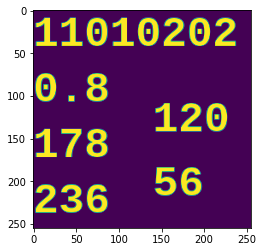

In [6]:
plt.imshow(X[3,0])

### Neural Network

In [7]:
device='cuda:0'
net = NN(model=models.resnet18(pretrained=True),
         cut=1,
         add=Sequential(Sequential(Linear(512,100),ReLU(),Linear(100,2)),Softmax(dim=1)),
         gradients=10)
net=net.to(device)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=11, shuffle=True)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1, shuffle=True)

train_data = torch.utils.data.DataLoader(list(zip(X_train,Y_train)), batch_size=32, shuffle=True, drop_last=True,num_workers=2)
validation_data = torch.utils.data.DataLoader(list(zip(X_val,Y_val)),batch_size=1,num_workers=2) 

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

net.optimization(criterion,optimizer)
Train_stats, Test_stats = net.TRAIN(train_data,validation_data, 
                                    epochs=50, 
                                    batch_size=32,
                                    verbose=1,
                                    random_seed=1,
                                    device=device)

net.save()

-----      TRAIN RESULTS      -----
{'Epoch': 1.0, 'Accuracy': 0.5104166666666666, 'Loss': 0.6920826037724813}
-----      Validation  RESULTS     -----
{'Epoch': 1.0, 'Accuracy': 0.5510204081632653, 'Loss': 0.690155165536063}
-----      TRAIN RESULTS      -----
{'Epoch': 2.0, 'Accuracy': 0.6822916666666666, 'Loss': 0.6595261295636495}
-----      Validation  RESULTS     -----
{'Epoch': 2.0, 'Accuracy': 0.6122448979591837, 'Loss': 0.675025613940492}
-----      TRAIN RESULTS      -----
{'Epoch': 3.0, 'Accuracy': 0.7760416666666666, 'Loss': 0.617822527885437}
-----      Validation  RESULTS     -----
{'Epoch': 3.0, 'Accuracy': 0.6530612244897959, 'Loss': 0.6530954545857955}
-----      TRAIN RESULTS      -----
{'Epoch': 4.0, 'Accuracy': 0.828125, 'Loss': 0.5624697605768839}
-----      Validation  RESULTS     -----
{'Epoch': 4.0, 'Accuracy': 0.7142857142857143, 'Loss': 0.6094778259189761}
-----      TRAIN RESULTS      -----
{'Epoch': 5.0, 'Accuracy': 0.828125, 'Loss': 0.51326584815979}
----- 

-----      TRAIN RESULTS      -----
{'Epoch': 39.0, 'Accuracy': 1.0, 'Loss': 0.3144812434911728}
-----      Validation  RESULTS     -----
{'Epoch': 39.0, 'Accuracy': 0.7959183673469388, 'Loss': 0.4929633237877671}
-----      TRAIN RESULTS      -----
{'Epoch': 40.0, 'Accuracy': 1.0, 'Loss': 0.31378814578056335}
-----      Validation  RESULTS     -----
{'Epoch': 40.0, 'Accuracy': 0.7959183673469388, 'Loss': 0.4924776225673909}
-----      TRAIN RESULTS      -----
{'Epoch': 41.0, 'Accuracy': 1.0, 'Loss': 0.3148824522892634}
-----      Validation  RESULTS     -----
{'Epoch': 41.0, 'Accuracy': 0.7959183673469388, 'Loss': 0.4897896027078434}
-----      TRAIN RESULTS      -----
{'Epoch': 42.0, 'Accuracy': 1.0, 'Loss': 0.31445474922657013}
-----      Validation  RESULTS     -----
{'Epoch': 42.0, 'Accuracy': 0.7959183673469388, 'Loss': 0.49069298286827245}
-----      TRAIN RESULTS      -----
{'Epoch': 43.0, 'Accuracy': 1.0, 'Loss': 0.314138983686765}
-----      Validation  RESULTS     -----
{'Ep

## Visualization

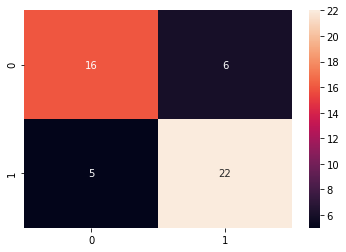

In [9]:
C=net.confusion_matrix(X_val,Y_val,heatmap=True)

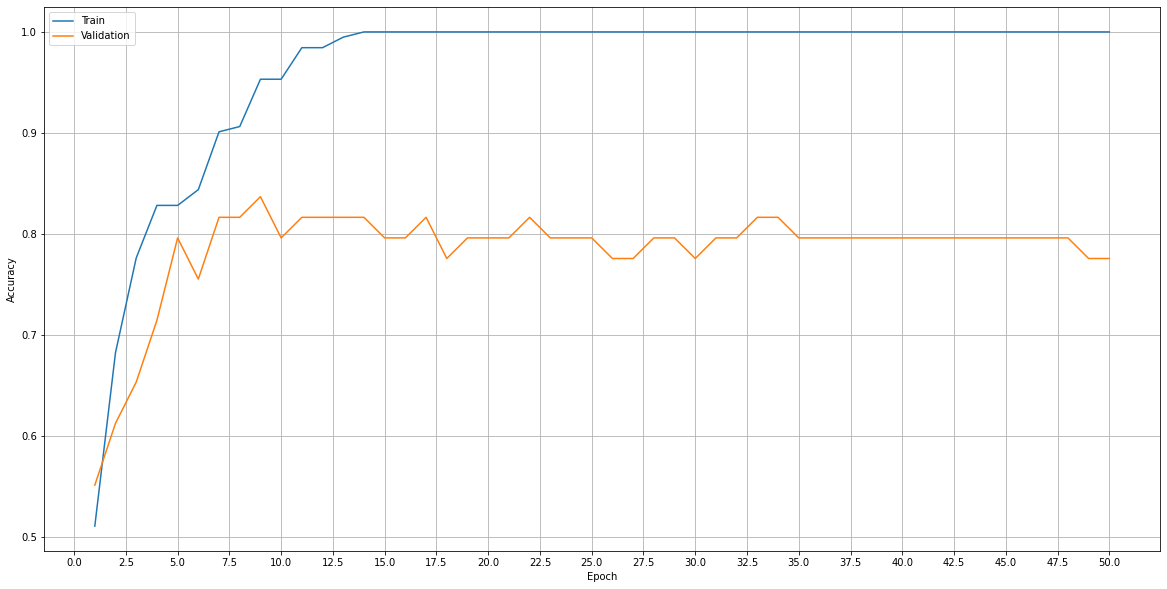

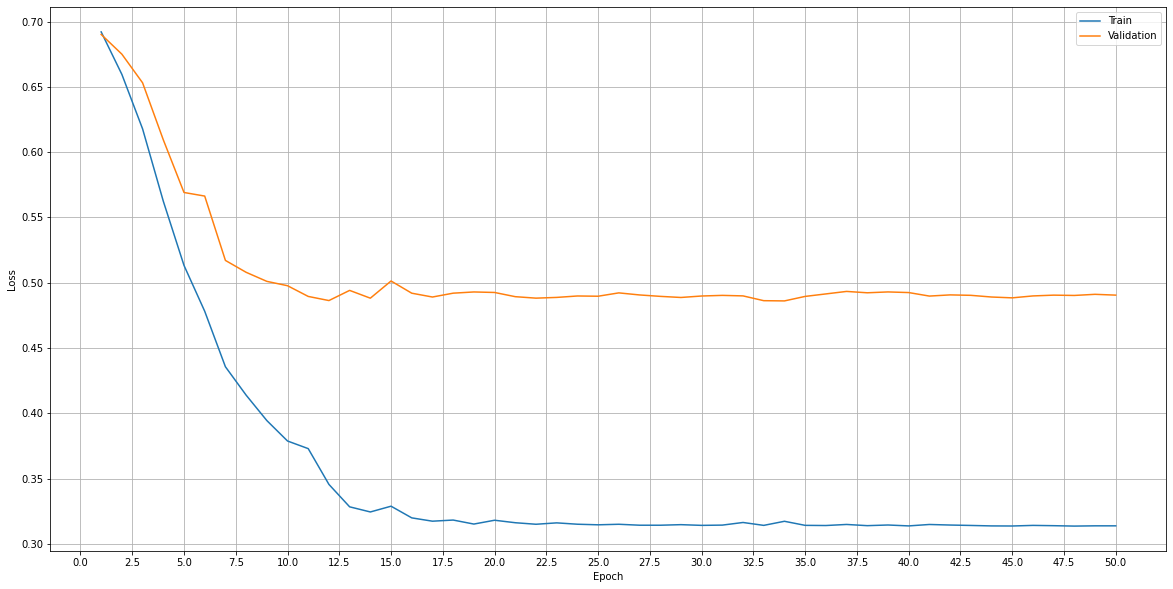

In [10]:
net.plot('Accuracy')
net.plot('Loss')

### TESTING OUR PERFORMANCE

array([[20,  4],
       [ 7, 30]], dtype=int64)

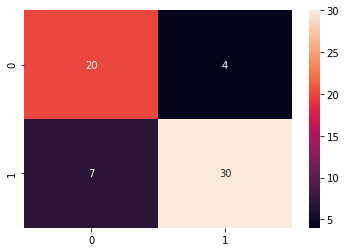

In [12]:
net.confusion_matrix(X_test,Y_test,heatmap=True)

In [13]:
net.score(X_test,Y_test)

0.819672131147541